In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
fun= lambda x,y,z,w: x**2+y**2+z**2+w**2-1

In [3]:
def GetVectorF(fun,r):  
    v = np.array([fun(*r)])
    return v

In [4]:
def GetMetric(fun,r):
    v = GetVectorF(fun,r)
    return 0.5*np.linalg.norm(v)**2

In [5]:
def GetJacobian(fun,r,h=1e-6):
    J = np.zeros((1,4))
    for n in range(4):
        xd=np.zeros(4)
        xd[n]=h
        J[:,n] = (fun(*r+xd)-fun(*r-xd))/(2*h)
    return J.T

In [6]:
def GetVector(i=-1,f=1,dim=4):
    lista=[]
    for n in range(dim):
        lista.append(np.random.uniform(i,f))
    return np.array(lista)

In [7]:
def GetSolve(G,r,lr=1e-3,epochs=int(1e5),error=1e-7):
    d = 1
    it = 0
    Vector_F = np.array([])
    R_vector = np.array(r)
    while d > error and it < epochs:
        
        CurrentF = GetMetric(G,r)
        J = GetJacobian(G,r)
        GVector = GetVectorF(G,r)
        #Machine Learning
        r -= lr*np.dot(J,GVector) 
        R_vector = np.vstack((R_vector,r))
        NewF = GetMetric(G,r)
        Vector_F = np.append(Vector_F,NewF)
        d = np.abs( CurrentF - NewF )/NewF

        it += 1
        
    if it == epochs:
        print(' Entrenamiento no completado ')
    return r,it

In [8]:
def GetPoints(fun,N=10**3):
    lista=np.zeros((N,4))

    for i in tqdm(range(N)):
        sol,it=GetSolve(fun,GetVector())
        lista[i,0]= sol[0]
        lista[i,1]= sol[1]
        lista[i,2]= sol[2]
    return lista

lista= GetPoints(fun,100)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:57<00:00,  1.18s/it]


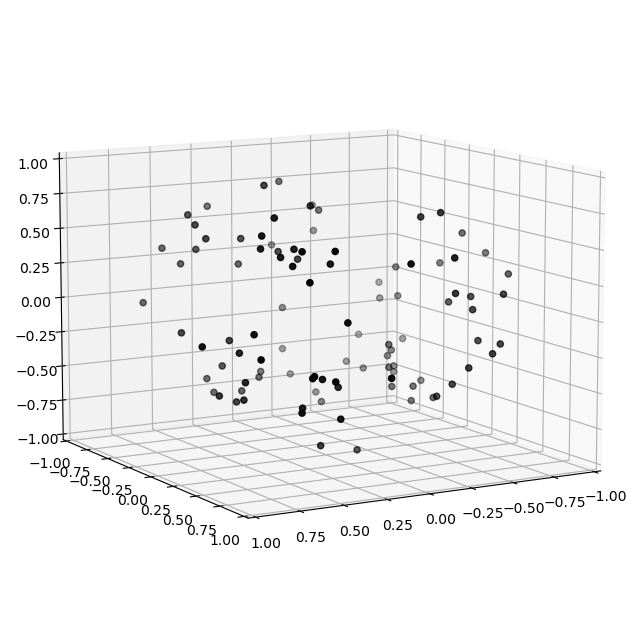

In [9]:
def graficar3d(lista):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1,1,1, projection = '3d')

    ax.set_xlim3d(-1, 1)
    ax.set_ylim3d(-1, 1)
    ax.set_zlim3d(-1, 1)

    ax.view_init(10, 60)
    x=lista[:,0]
    y=lista[:,1]
    z=lista[:,2]
    ax.scatter(x,y,z,color='k')
    plt.show()

graficar3d(lista)

In [18]:
lista.T.shape

(4, 100)